In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import json # library to handle JSON files
import folium # plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import zipfile # tool to unpack zip files

print('All libraries are imported.')

All libraries are imported.


In [56]:
# Function to explore all districts

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        LIMIT = 100 # limit of number of venues returned by Foursquare API
        radius = 5000 # define radius      
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Districts', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
# Import the information about the administrative disticts from the city of São Paulo
# This dataset is avaiable at Kaggle in https://www.kaggle.com/caiobsilva/sp-district-coordinates

# Download and unpack the dataset from the repository
!kaggle datasets download -d caiobsilva/sp-district-coordinates

with zipfile.ZipFile('/home/chico/git_workspace/sp-district-coordinates.zip', 'r') as zip_ref:
    zip_ref.extractall("/home/chico/git_workspace/")

print('Data downloaded! This is the dataframe to districts for the city of São Paulo.')

# Import the dataset from the json data file for the city of São Paulo
with open('sp_dist.json') as json_data:
    saopaulo_data = json.load(json_data)

# if you need to look the imported dataset to set the parameters to pandas uncomment this line
# saopaulo_data 

spdist_df = pd.read_json(r'sp_dist.json',orient='columns') #transform json in a pandas dataframe
spdist_df.reset_index(drop=True, inplace=True) # Reset the index

spdist_df = spdist_df[['Districts','Latitude','Longitude','Population']] # Change de column order

spdist_df

In [3]:
print("The dataframe has {} districts.".format(len(spdist_df['Districts'].unique())),"This is consistent "
      "with the administrative division of the city estabilished by laws 10.932/91 and 11.220/1992.")

The dataframe has 96 districts. This is consistent with the administrative division of the city estabilished by laws 10.932/91 and 11.220/1992.


In [4]:
# Let's find the coordinates for the city of São Paulo
address = 'São Paulo, SP, Brasil'

# find the latitude and longitude from a specific address
geolocator = Nominatim(user_agent='city_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geograpical coordinates for the city of São Paulo city are {}, {}.".format(latitude, longitude))

The geograpical coordinates for the city of São Paulo city are -23.5506507, -46.6333824.


In [10]:
# create map of Sao Paulo using latitude and longitude values
map_saopaulo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district_name, population in zip(spdist_df['Latitude'], spdist_df['Longitude'], spdist_df['Districts'], spdist_df['Population']):
    label = 'Name: {}, Population: {}'.format(district_name,population)
    label = folium.Popup(label, parse_html=True)       
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_saopaulo)
    
map_saopaulo

In [ ]:
# Foursquare credentials and version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [48]:
sp_venues = getNearbyVenues(names=spdist_df['Districts'],
                            latitudes=spdist_df['Latitude'],
                            longitudes=spdist_df['Longitude']
                                  )

Grajaú
Sapopemba
Jardim Ângela
Brasilândia
Capão Redondo
Jardim São Luís
Cidade Ademar
Itaim Paulista
Sacomã
Jaraguá
Cidade Tiradentes
Campo Limpo
Jabaquara
Cidade Dutra
Itaquera
Tremembé
Lajeado
Vila Jacuí
Pirituba
Vila Curuçá
Pedreira
São Mateus
Cachoeirinha
Jardim Helena
Cangaíba
São Rafael
Parelheiros
Freguesia do Ó
São Lucas
Cidade Líder
Vila Medeiros
Iguatemi
Penha
Ermelino Matarazzo
Rio Pequeno
Vila Mariana
Santana
Guaianases
Saúde
José Bonifácio
Vila Maria
Artur Alvim
Mandaqui
Vila Andrade
Vila Matilde
Perdizes
Raposo Tavares
Campo Grande
Vila Prudente
Ipiranga
Ponte Rasa
São Miguel Paulista
Aricanduva
Cursino
Jaçanã
São Domingos
Vila Sônia
Vila Formosa
Tucuruvi
Perus
Limão
Itaim Bibi
Água Rasa
Jardim Paulista
Casa Verde
Tatuapé
Moema
Carrão
Parque do Carmo
Santa Cecília
Mooca
Campo Belo
Pinheiros
Santo Amaro
Lapa
Liberdade
Bela Vista
Anhanguera
Vila Guilherme
Butantã
Consolação
República
Jaguaré
Alto de Pinheiros
Socorro
Belém
Morumbi
Vila Leopoldina
Cambuci
Bom Retiro
Brás
Ja

In [49]:
print(sp_venues.shape)
sp_venues.head()

(9093, 7)


,Districts,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Grajaú,-23.785798,-46.665575,Jd Três Corações,-23.771876,-46.682684,Plaza
1,Grajaú,-23.785798,-46.665575,Toka do Acai,-23.756420,-46.665274,Snack Place
2,Grajaú,-23.785798,-46.665575,Sorvetes Zequinha,-23.768768,-46.705608,Ice Cream Shop
3,Grajaú,-23.785798,-46.665575,Boteco Zé das Medalhas (Bar Azul),-23.756338,-46.701403,Food Truck
4,Grajaú,-23.785798,-46.665575,Phisical Gym Academia,-23.772196,-46.707490,Gym


In [50]:
sp_venues.groupby('Districts').count()
print('There are {} uniques venue categories.'.format(len(sp_venues['Venue Category'].unique())))

There are 286 uniques venue categories.


In [53]:
# Analyse each district
sp_onehot = pd.get_dummies(sp_venues[['Venue Category']], prefix="", prefix_sep="")
sp_onehot['Districts'] = sp_venues['Districts'] # add neighborhood column back to dataframe
# move neighborhood column to the first column
fixed_columns = [sp_onehot.columns[-1]] + list(sp_onehot.columns[:-1])
sp_onehot = sp_onehot[fixed_columns]
sp_onehot.head()

,Districts,ATM,Acai House,Accessories Store,Airport,Amphitheater,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Grajaú,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grajaú,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grajaú,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grajaú,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grajaú,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
sp_grouped = sp_onehot.groupby('Districts').mean().reset_index()
sp_grouped

,Districts,ATM,Acai House,Accessories Store,Airport,Amphitheater,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Alto de Pinheiros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.00,0.00,0.00,0.01,0.0,0.000000,0.0,0.0,0.0
1,Anhanguera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.017857,0.0,0.0,0.0
2,Aricanduva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.01,0.00,0.01,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
3,Artur Alvim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
4,Barra Funda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Vila Matilde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
92,Vila Medeiros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
93,Vila Prudente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,...,0.01,0.00,0.00,0.00,0.01,0.0,0.000000,0.0,0.0,0.0
94,Vila Sônia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.00,0.00,0.01,0.00,0.0,0.000000,0.0,0.0,0.0


In [55]:
num_top_venues = 10

for hood in sp_grouped['Districts']:
    print("----"+hood+"----")
    temp = sp_grouped[sp_grouped['Districts'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alto de Pinheiros----
                  venue  freq
0           Pizza Place  0.06
1                 Plaza  0.05
2             Pet Store  0.05
3           Flower Shop  0.04
4                Bakery  0.03
5                   Bar  0.03
6          Burger Joint  0.03
7  Brazilian Restaurant  0.03
8          Dessert Shop  0.03
9    Athletics & Sports  0.02


----Anhanguera----
                   venue  freq
0                   Park  0.07
1   Gym / Fitness Center  0.07
2            Pizza Place  0.07
3                 Bakery  0.07
4                  Trail  0.05
5                    Gym  0.05
6       Recording Studio  0.05
7                 Market  0.04
8  Outdoors & Recreation  0.04
9             Food Court  0.04


----Aricanduva----
                  venue  freq
0           Pizza Place  0.11
1                Bakery  0.08
2          Dessert Shop  0.07
3                   Gym  0.05
4  Gym / Fitness Center  0.04
5             Pet Store  0.04
6          Burger Joint  0.04
7  Brazilian Restaura

                  venue  freq
0                Bakery  0.09
1         Grocery Store  0.09
2           Supermarket  0.04
3  Brazilian Restaurant  0.04
4           Pizza Place  0.04
5                   Gym  0.04
6        Ice Cream Shop  0.03
7        Student Center  0.03
8     Martial Arts Dojo  0.02
9             BBQ Joint  0.02


----Consolação----
                venue  freq
0      Ice Cream Shop  0.08
1  Italian Restaurant  0.05
2          Art Museum  0.04
3               Hotel  0.04
4  Athletics & Sports  0.03
5               Plaza  0.03
6           Pet Store  0.03
7     Cultural Center  0.03
8                Café  0.03
9         Art Gallery  0.03


----Cursino----
                       venue  freq
0                  Pet Store  0.05
1                Pizza Place  0.05
2                 Restaurant  0.04
3               Burger Joint  0.04
4               Dessert Shop  0.04
5  Middle Eastern Restaurant  0.03
6       Brazilian Restaurant  0.03
7       Gym / Fitness Center  0.03
8       

                  venue  freq
0                Bakery  0.10
1           Pizza Place  0.08
2  Gym / Fitness Center  0.07
3                   Bar  0.07
4        Farmers Market  0.04
5            Restaurant  0.03
6   Japanese Restaurant  0.03
7             Pet Store  0.03
8  Brazilian Restaurant  0.03
9          Burger Joint  0.02


----Marsilac----
                  venue  freq
0  Brazilian Restaurant   1.0
1                   ATM   0.0
2   Peruvian Restaurant   0.0
3           Pizza Place   0.0
4              Pie Shop   0.0
5       Photography Lab   0.0
6              Pharmacy   0.0
7             Pet Store   0.0
8           Pet Service   0.0
9    Persian Restaurant   0.0


----Moema----
                  venue  freq
0        Ice Cream Shop  0.08
1            Restaurant  0.04
2          Dessert Shop  0.04
3          Cycle Studio  0.03
4    Salon / Barbershop  0.03
5  Gym / Fitness Center  0.03
6    Seafood Restaurant  0.02
7        Chocolate Shop  0.02
8                  Park  0.02
9    

                  venue  freq
0  Brazilian Restaurant  0.07
1          Dessert Shop  0.07
2                Bakery  0.06
3           Pizza Place  0.06
4             Pet Store  0.04
5                   Bar  0.04
6            Restaurant  0.04
7   Japanese Restaurant  0.04
8            Steakhouse  0.03
9    Athletics & Sports  0.03


----São Domingos----
                  venue  freq
0                Bakery  0.07
1  Brazilian Restaurant  0.06
2          Dessert Shop  0.06
3                  Park  0.04
4  Gym / Fitness Center  0.04
5                   Gym  0.04
6           Pizza Place  0.04
7            Pastelaria  0.03
8             BBQ Joint  0.03
9              Tea Room  0.03


----São Lucas----
                venue  freq
0              Bakery  0.07
1        Dessert Shop  0.06
2           Pet Store  0.05
3        Burger Joint  0.04
4       Deli / Bodega  0.04
5         Supermarket  0.04
6         Pizza Place  0.03
7  Italian Restaurant  0.03
8                Park  0.03
9      Farmers Ma

In [70]:
num_top_venues = 10
# 1st is "1" + "st" from "first"; similarly "nd" is used for "second" and "rd" for "third"
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Districts'] = sp_grouped['Districts']

for ind in np.arange(sp_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sp_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,Pizza Place,Pet Store,Plaza,Flower Shop,Bar,Bakery,Burger Joint,Dessert Shop,Brazilian Restaurant,Sporting Goods Shop
1,Anhanguera,Park,Gym / Fitness Center,Bakery,Pizza Place,Recording Studio,Trail,Gym,Farm,Ice Cream Shop,Food Court
2,Aricanduva,Pizza Place,Bakery,Dessert Shop,Gym,Pet Store,Burger Joint,Gym / Fitness Center,Italian Restaurant,Snack Place,Brazilian Restaurant
3,Artur Alvim,Dessert Shop,Pizza Place,Restaurant,Japanese Restaurant,Bar,Bakery,Gym / Fitness Center,Brazilian Restaurant,Gymnastics Gym,Pharmacy
4,Barra Funda,Pet Store,Bar,Seafood Restaurant,Theater,Café,Art Gallery,Japanese Restaurant,Athletics & Sports,Ice Cream Shop,Steakhouse


In [73]:
districts_venues_sorted.shape

(96, 11)

range(1, 10)


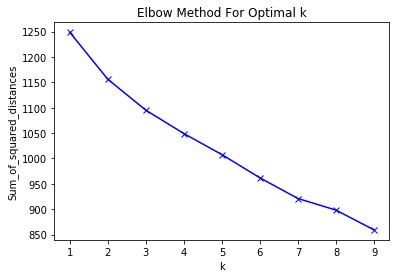

In [98]:
# Elbow Criterion Method:
# Maybe the best k is 2 ou 3

spdist_grouped_clustering = sp_grouped.drop('Districts', 1)

mms = MinMaxScaler()
mms.fit(spdist_grouped_clustering)
spdist_grouped_clustering_transformed = mms.transform(spdist_grouped_clustering)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(spdist_grouped_clustering_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
print(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.8210573962604745
For n_clusters=3, The Silhouette Coefficient is 0.1475455275919334
For n_clusters=4, The Silhouette Coefficient is 0.10848908210594288
For n_clusters=5, The Silhouette Coefficient is 0.09116363507628773
For n_clusters=6, The Silhouette Coefficient is 0.09659645843672576
For n_clusters=7, The Silhouette Coefficient is 0.09220412097070717
For n_clusters=8, The Silhouette Coefficient is 0.0813724485647067
For n_clusters=9, The Silhouette Coefficient is 0.07520483576327115


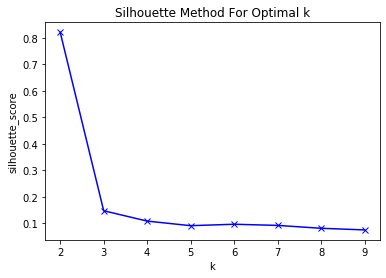

In [97]:
# The Silhouette Method
# Set K = 3

sil = []
K_sil = range(2,10)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    #print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(spdist_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(spdist_grouped_clustering, labels, metric = 'euclidean'))
    sil_coeff = silhouette_score(spdist_grouped_clustering, labels, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [99]:
# Cluster Districts

# set number of clusters
kclusters = 3

sp_grouped_clustering = sp_grouped.drop('Districts', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 2], dtype=int32)

In [100]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each district.

districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # descomentar se o cluster labes nao aparecer
spdist_merged = spdist_df
spdist_merged = spdist_merged.join(districts_venues_sorted.set_index('Districts'), on='Districts')
spdist_merged.head() # check the last columns!

,Districts,Latitude,Longitude,Population,geometry,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Grajaú,-23.785798,-46.665575,444.593,POINT (-46.66557 -23.78580),0,Gym / Fitness Center,Bakery,Snack Place,Food Truck,Ice Cream Shop,Supermarket,Park,Gym,Pizza Place,Fast Food Restaurant
1,Sapopemba,-23.604326,-46.509885,296.042,POINT (-46.50989 -23.60433),0,Bakery,Pizza Place,Gym / Fitness Center,Gym,Dessert Shop,Pet Store,Food Truck,Japanese Restaurant,Snack Place,Grocery Store
2,Jardim Ângela,-23.712246,-46.771206,291.798,POINT (-46.77121 -23.71225),0,Bakery,Pizza Place,Gym,Grocery Store,Gym / Fitness Center,Park,Bar,Brazilian Restaurant,Plaza,Historic Site
3,Brasilândia,-23.448272,-46.690269,280.069,POINT (-46.69027 -23.44827),0,Pizza Place,Gym / Fitness Center,Brazilian Restaurant,Bakery,Bar,Gym,Supermarket,Chocolate Shop,Ice Cream Shop,Gymnastics Gym
4,Capão Redondo,-23.658859,-46.767753,275.230,POINT (-46.76775 -23.65886),0,Gym / Fitness Center,Bakery,Gym,Pizza Place,Pet Store,Brazilian Restaurant,Bar,Asian Restaurant,Cosmetics Shop,Dessert Shop


In [101]:
# Finally, let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(spdist_merged['Latitude'], spdist_merged['Longitude'], spdist_merged['Districts'], spdist_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [134]:
# Examine clusters

# Cluster 1
cluster_1 = spdist_merged.loc[spdist_merged['Cluster Labels'] == 0, spdist_merged.columns[[6] + list(range(7, spdist_merged.shape[1]))]]
cluster_1

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gym / Fitness Center,Bakery,Snack Place,Food Truck,Ice Cream Shop,Supermarket,Park,Gym,Pizza Place,Fast Food Restaurant
1,Bakery,Pizza Place,Gym / Fitness Center,Gym,Dessert Shop,Pet Store,Food Truck,Japanese Restaurant,Snack Place,Grocery Store
2,Bakery,Pizza Place,Gym,Grocery Store,Gym / Fitness Center,Park,Bar,Brazilian Restaurant,Plaza,Historic Site
3,Pizza Place,Gym / Fitness Center,Brazilian Restaurant,Bakery,Bar,Gym,Supermarket,Chocolate Shop,Ice Cream Shop,Gymnastics Gym
4,Gym / Fitness Center,Bakery,Gym,Pizza Place,Pet Store,Brazilian Restaurant,Bar,Asian Restaurant,Cosmetics Shop,Dessert Shop
5,Pizza Place,Brazilian Restaurant,Dessert Shop,Pet Store,Gym,Gym / Fitness Center,Athletics & Sports,Japanese Restaurant,Tea Room,Bar
6,Bakery,Gym / Fitness Center,Pizza Place,Japanese Restaurant,Gym,Pet Store,Dessert Shop,Chocolate Shop,Brazilian Restaurant,Bar
7,Bakery,Gym,Pizza Place,Japanese Restaurant,Market,Gym / Fitness Center,Brazilian Restaurant,Fast Food Restaurant,Bar,Dessert Shop
9,Bakery,Gym / Fitness Center,Brazilian Restaurant,Gym,Park,Market,Pizza Place,Pharmacy,Farmers Market,Trail
10,Grocery Store,Bakery,Gym,Supermarket,Brazilian Restaurant,Pizza Place,Student Center,Ice Cream Shop,Dessert Shop,Gym / Fitness Center


In [135]:
best_from_1 = cluster_0.stack().value_counts()
best_from_1.head(10)

Bakery                  44
Pizza Place             41
Gym / Fitness Center    41
Brazilian Restaurant    40
Dessert Shop            30
Gym                     29
Bar                     25
Japanese Restaurant     20
Restaurant              17
Pet Store               14
dtype: int64

In [136]:
# Cluster 2
cluster_2 = spdist_merged.loc[spdist_merged['Cluster Labels'] == 1, spdist_merged.columns[[6] + list(range(7, spdist_merged.shape[1]))]]
cluster_2

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,Brazilian Restaurant,Zoo,Food & Drink Shop,Field,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court


In [138]:
best_from_2 = cluster_2.stack().value_counts()
best_from_2.head(10)

Brazilian Restaurant    1
Flower Shop             1
Flea Market             1
Film Studio             1
Field                   1
Food & Drink Shop       1
Food                    1
Zoo                     1
Fish & Chips Shop       1
Food Court              1
dtype: int64

In [139]:
# Cluster 3
cluster_3 = spdist_merged.loc[spdist_merged['Cluster Labels'] == 2, spdist_merged.columns[[6] + list(range(7, spdist_merged.shape[1]))]]
cluster_3

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Pet Store,Pizza Place,Ice Cream Shop,Burger Joint,Middle Eastern Restaurant,Bar,Gym,Brazilian Restaurant,Deli / Bodega,Japanese Restaurant
12,Bakery,Gym / Fitness Center,Brazilian Restaurant,Pet Store,Park,Dessert Shop,Italian Restaurant,Burger Joint,Mineiro Restaurant,Pizza Place
20,Arts & Crafts Store,Brazilian Restaurant,Café,Furniture / Home Store,Bakery,Burger Joint,Restaurant,Ice Cream Shop,Big Box Store,Seafood Restaurant
28,Bakery,Dessert Shop,Pet Store,Deli / Bodega,Supermarket,Burger Joint,Pizza Place,Bar,Park,Italian Restaurant
29,Pizza Place,Dessert Shop,Pharmacy,Ice Cream Shop,Steakhouse,Bakery,Gymnastics Gym,Gym,Pastelaria,Gym / Fitness Center
32,Dessert Shop,Bakery,Seafood Restaurant,Market,Gym / Fitness Center,Grocery Store,Fruit & Vegetable Store,Pizza Place,Supermarket,Brazilian Restaurant
35,Dessert Shop,Ice Cream Shop,Restaurant,Burger Joint,Gym,Park,Brazilian Restaurant,Pet Store,Pizza Place,Dance Studio
36,Pizza Place,Bar,Burger Joint,Japanese Restaurant,Gym / Fitness Center,Dessert Shop,Fruit & Vegetable Store,Bakery,Market,Cosmetics Shop
38,Dessert Shop,Ice Cream Shop,Pet Store,Gym / Fitness Center,Restaurant,Bakery,Mineiro Restaurant,Burger Joint,Brazilian Restaurant,Salon / Barbershop
40,Bar,Pet Store,Bakery,Brazilian Restaurant,Burger Joint,Pizza Place,Gym / Fitness Center,Theater,Clothing Store,Middle Eastern Restaurant


In [140]:
best_from_3 = cluster_3.stack().value_counts()
best_from_3.head(10)

Pizza Place             38
Bakery                  32
Pet Store               32
Dessert Shop            31
Ice Cream Shop          27
Italian Restaurant      27
Burger Joint            24
Brazilian Restaurant    22
Gym / Fitness Center    22
Bar                     18
dtype: int64